In [4]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
%matplotlib inline

"""
Data Management
"""
data = pd.read_csv(r"C:\Users\piush\Desktop\Dataset\tree_addhealth.csv")

#upper-case all DataFrame column names
data.columns = map(str.upper, data.columns)

# Data Management

data_clean = data.dropna()

# subset clustering variables
cluster=data_clean[['ALCEVR1','MAREVER1','ALCPROBS1','DEVIANT1','VIOL1',
'DEP1','ESTEEM1','SCHCONN1','PARACTV', 'PARPRES','FAMCONCT']]
cluster.describe()

# standardize clustering variables to have mean=0 and sd=1
clustervar=cluster.copy()
clustervar['ALCEVR1']=preprocessing.scale(clustervar['ALCEVR1'].astype('float64'))
clustervar['ALCPROBS1']=preprocessing.scale(clustervar['ALCPROBS1'].astype('float64'))
clustervar['MAREVER1']=preprocessing.scale(clustervar['MAREVER1'].astype('float64'))
clustervar['DEP1']=preprocessing.scale(clustervar['DEP1'].astype('float64'))
clustervar['ESTEEM1']=preprocessing.scale(clustervar['ESTEEM1'].astype('float64'))
clustervar['VIOL1']=preprocessing.scale(clustervar['VIOL1'].astype('float64'))
clustervar['DEVIANT1']=preprocessing.scale(clustervar['DEVIANT1'].astype('float64'))
clustervar['FAMCONCT']=preprocessing.scale(clustervar['FAMCONCT'].astype('float64'))
clustervar['SCHCONN1']=preprocessing.scale(clustervar['SCHCONN1'].astype('float64'))
clustervar['PARACTV']=preprocessing.scale(clustervar['PARACTV'].astype('float64'))
clustervar['PARPRES']=preprocessing.scale(clustervar['PARPRES'].astype('float64'))



First, we will call in the libraries that we will need. In addition to the pandas, numpy, and matplotlib libraries we'll need the train_test_split function from the sklearn.cross_validation library, and the pre processing function from the sklearn library. Finally, we will need the k-Means function from the sklearn.cluster library. After calling in the data set using pd._read_csv function we will do some data management. Namely, we will create a new data set called data_clean in which we will delete observations with missing data on any of the variables using the dropna function, then we will create a data set called cluster that includes only our clustering variables. 
***
In cluster analysis variables with large values contribute more to the distance calculations. Variables measured on different scales should be standardized prior to clustering, so that the solution is not driven by variables measured on larger scales. We use the following code to standardize the clustering variables to have a mean of 0, and a standard deviation of 1. To standardize the clustering variables we will first create a copy of the cluster data frame and name it cluster var, then we use the preprocessing.scale function to transform the clustering variables to have a mean of 0 and a standard deviation of 1. First, we list the name of the clustering variable, then an equal sign, and preprocessing.scale, then in parentheses we type the name of our variable again and add .astype, and then in another set of parentheses, float64 in quotes. Astype float64 ensures that my clustering variables have a numeric format, and we will do this for all the clustering variables, then we will use the train test split function in the sklearn cross validation library to randomly split the clustering variable data set into a training data set consisting of 70% of the total observations, and a test data set consisting of the other 30% of the observations. First we'll type the name of the data set which we'll call clus_train followed by the name of the test data set which we'll call clus_test, then we type the function name, train_test_split, and in parenthesis we type the name of the full standardized cluster variable data set which we called clustevar. The test_size option tells Python to randomly place 0.3, that is 30% of the observations in the test data set that we named clus_test. By default the other 70% of the observations are placed in the clus_train training dataset. The random_state option specifies a random number seat to ensure that the data are randomly split the same way if I run the code again. Now we are ready to run our cluster analysis, because we don't know how many clusters actually exist in the population for a range of values on the number of clusters before we begin we'll import the cdist function from the scipy.spatial.distance library. In this example we will use it to calculate the average distance of the observations from the cluster centroids. Later, we can plot this average distance measure to help us figure out how many clusters may be optimal, then we will create an object called clusters that will include numbers in the range between 1 and 10. We will use this object when we specify the number of clusters we want to test, which will give us the cluster solutions for k equals 1 to k equals 9 clusters. In the next line of code we create an object called meandist that will be used to store the average distance values that we will calculate for the 1 to 9 cluster solutions. The for k in clusters: code tells Python to run the cluster analysis code below for each value of k in the cluster's object. 
***
That is to run cluster analysis specifying 1 through 9 clusters, then we will use the k-Means function From the sk learning cluster library to run the cluster analyses. In parentheses n_clusters indicates the number of clusters, which in our example we substitute with k to tell Python to run the cluster analysis for 1 through 9 clusters, then we create an object called clusassign that will store for each observation the cluster number to which it was assigned based on the cluster analysis. After the equals sign model.predict asks that the results of the cluster analyses stored in the model object be used to predict the closest cluster that each observation belongs to, then we are going to calculate an average distance measure for each cluster solution independent to our currently empty mean dist object. The code following meandist.append computes the average of the sum of the distances between each observation in the cluster centroids. The formula first calculates the distance between each observation and the cluster centroids where the number of centroids is equal to the number of clusters that were specified in the cluster analysis in the first set of parentheses. We use the cdist function from the scipy spacial distance library to calculate the distance. In parentheses we type the name of our clustering variable data set clus_train followed by a comma, and model.cluster_centers_, which is the name of the model results attribute that contains the cluster centeroids, then we type another comma and the word Euclidean in single quotes. This tells Python to use cdist to calculate the distance between each observation in the clus_train data set in the cluster centroids using Euclidean distance, then we use np.min function to determine the smallest or minimum difference for each observation among the cluster centroids. Axis equals 1 means that the minimum should be determine by examining the distance between the observation and each centroid taking the smallest distance as the value of the minimum, then we use the sum function to sum the minimum distances across all observations. Finally, the / clus_train.shape with 0 in brackets divides the sum of the distances by the number of observations in the clus_train data set where the .shape with 0 in brackets code returns the number of observations in the clus_train data set. Now that we have the average distance calculated for each of the 1 to 9 cluster solutions we can plot the elbow curve using the map plot lib plot function that we imported as plt. 
***
In parenthesis clusters is the object that includes the values of 1 through 9 for the range of clusters we specified and meandist is the average distance value that we just calculated. 
***
So what this plot shows is the decrease in the average minimum distance of the observations from the cluster centroids for each of the cluster solutions. We can see that the average distance decreases as the number of clusters increases. Since the goal of cluster analysis is to minimize the distance between observations and their assigned clusters we want to chose the fewest numbers of clusters that provides a low average distance. What we're looking for in this plot is a bend in the elbow that kind of shows where the average distance value might be leveling off such that adding more clusters doesn't decrease the average distance as much. You can see how subjective this is though. There appears to be a couple of bends at the line at two clusters and at three clusters, but it's not very clear. To help us figure out which of the solutions is best we should further examine the cluster solutions for at least the two and three cluster solutions to see whether they do not overlap, whether the patterns of means on the clustering variables are unique and meaningful, and whether there are significant differences between the clusters on our external validation variable GPA. 

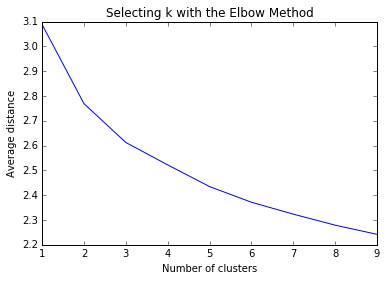

In [5]:
# split data into train and test sets
clus_train, clus_test = train_test_split(clustervar, test_size=.3, random_state=123)

# k-means cluster analysis for 1-9 clusters                                                           
from scipy.spatial.distance import cdist
clusters=range(1,10)
meandist=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clus_train)
    clusassign=model.predict(clus_train)
    meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1)) 
    / clus_train.shape[0])

"""
Plot average distance from observations from the cluster centroid
to use the Elbow Method to identify number of clusters to choose
"""

plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')



As an example, let's interpret the 3 cluster solution. 
***
So we'll rerun the cluster analysis, this time asking for 3 clusters. So we create an object, model 3, which will contain the results from the cluster analysis with 3 clusters =KMeans, and in parenthesis, n_clusters=3. And we fit the model and create an object called clusassign that has the cluster assignments based on the 3 cluster model. 
***
The first thing we want to try is to graph the clusters in a scatter plot to see whether or not they overlap with each other in terms of their location in the p dimensional space. However, with 11 clustering variables that means we have 11 dimensions, which would be impossible to visualize. A scatter plot will work to visualize a few dimensions, but not 11 dimensions. So what we're going to use is use canonical discriminate analysis, which is a data reduction technique that creates a smaller number of variables that are linear combinations of the 11 clustering variables. The new variables, called canonical variables, are ordered in terms of the proportion of variance and the clustering variables that is accounted for by each of the canonical variables. So the first canonical variable will count for the largest proportion of the variance. The second canonical variable will account for the next largest proportion of variance, and so on. Usually, the majority of the variance in the clustering variables will be accounted for by the first couple of canonical variables and those are the variables that we can plot. In Python, we can use the PCA function and the sklearn decomposition library to conduct the canonical discriminate analysis. So the first thing we need to do is import that function, then we create an object that we are going to call PCA_2. PCA(2) asks Python to return the two first canonical variables. Then we create a matrix called plot_columns that will include the two canonical variables estimated by the canonical discriminate analysis. PCA_2.fit asks Python to fit the canonical discriminate analysis that we specified with the PCA command, and the _transform applies the canonical discriminate analysis to the clus_train data set to calculate the canonical variables. We will plot the two canonical variables by the cluster assignment values from the 3 cluster solution in a scatter plot using the matplot libplot function. In parentheses, x=plot_columns with a colon and 0 separated by a comma, tells Python to plot the first canonical variable, which is in the first column in the plot_column matrix on the x axis, y=plot_columns with a colon and 1 separated by a comma tells Python to plot the second canonical variable on the y axis. Model3.labels_ contains the cluster assignment variable from the 3 cluster solution. So c=model3.labels_ tells python to color code the points for each of the three clusters. Then we add some code to add a title and label the axes on a scatter plot. 
***
Here is the scatter plot. What this shows is that these two clusters are densely packed, meaning that the observations within the clusters are pretty highly correlated with each other, and within cluster variance is relatively low. But they appear to have a good deal of overlap, meaning that there is not good separation between these two clusters. On the other hand, this cluster here shows better separation, but the observations are more spread out indicating less correlation among the observations and higher within cluster variance. This suggests that the two cluster solution might be better, meaning that it would be especially important to further evaluate the two cluster solution as well. Next we can take a look at the pattern of means on the clustering variables for each cluster to see whether they are distinct and meaningful. To do this, we have to link the cluster assignment variable back to its corresponding observation in the clus_train dataset that has the clustering variables. The first thing we need to do is create a unique identifier variable for our clus_train dataset that has the clustering variables. We can do this by using the index, which is automatically created by Python as part of a data frame. We will reset the index with the following code, clus_train.reset_index. In parenthesis, level=0 tells Python to only remove the given levels from the index, and inplace=True, tells Python to add the new column to the existing clus_train dataset. So now, we will have a new variable labeled index that we can use as a unique identifier. In the next step, we will create an object called cluslist and use the list function to pull the new index variable from the clus_train data set and convert it to a list. This will be combined with the cluster assignment variable, so that we can merge the two datasets together by each observation's unique identifier. Then we are going to do the same for our cluster assignment variable which is currently contained with the model3.labels_ attribute from the cluster analysis. We'll call this list labels, and use the list function again to create a list of the cluster assignment for each observation. Now we are going to combine the two lists with the unique identifier called index and cluster assignment together into a single list. We'll call this list newlist using a dict command to create a dictionary. The dict command creates a dictionary and the zip command is used to combine lists. So here we type dict(zip) and the two lists that we want to combine. Finally, we convert the newlist dictionary to a data frame using the data frame.from_dict function and rename the cluster assignment variable to cluster by typing newclus.columns=cluster. Now, we also have to create the same unique identifier for the newclus data frame using the model.visa_index function again. At this point, we are ready to merge the cluster assignment variable in the clustering variables. We do this by creating a new data frame, called merged_train, and we use the pandas merge function to merge the two data sets. On='index' tells Python to merge them when matching them on the unique identifier variable called index. Finally, we can get the means on the clustering variables for each cluster. 
***
I use the groupby function specifying the new cluster assignment variable and .mean with open and closed parentheses, which calculates the mean for all the clustering variables by cluster. Then I print the means. The means on the clustering variables showed that compared to the other clusters, adolescents in the first cluster, cluster 0, had the highest likelihood of having used alcohol, but otherwise tended to fall somewhere in between the other two clusters on the other variables. On the other hand, the second cluster, cluster 1, clearly includes the most troubled adolescents. Adolescents in this cluster had the highest likelihood of having used alcohol, a very high likelihood of having used marijuana, more alcohol problems, and more engagement in deviant and violent behaviors compared to the other two clusters. They also had higher levels of depression, lower self-esteem, and the lowest levels of school connectedness, parental presence, involvement of parent in activities, and family connectedness. The third cluster, cluster 2, appears to include the least troubled adolescents. Compared to adolescents in the other clusters, they were least likely to have used alcohol and marijuana, and had the lowest number of alcohol problems and deviant and violent behavior. They also had greater school and family connectedness. 
***
Finally, let's see how the clusters differ on GPA. 
***
We first have to extract the GPA variable from the original data set, split the data into test and training datasets, and then merge the training observations in the dataset that includes the cluster assignment variable with the training observations in the dataset that includes the clustering variables. 
****
Before merging, we need to reset the index for the GPA variable data frame to create the unique identifier to link the datasets. We then merge the datasets by the unique identifier index into a data frame called merge. 
****
We'll use analysis of variance to test whether there are significant differences between clusters on the quantitative GPA variable. 
****
To do this, we have to import the statsmodels.formula.api and the statsmodels.stats.multicomp libraries. We use the ols function to test the analysis of variance. The formula specifies the model, with GPA as the response variable and cluster, as the explanatory variable. The capital C tells Python that the cluster assignment variable is categorical. We can also print the mean GPA in standard deviation for each cluster using the groupby function. Then, because our categorical cluster variable has three categories, we will request a tukey test to evaluate post hot comparisons between the clusters using the multi comparison function from the statsmodels.stats.multicomplibrary which we imported as multi. Here are the results. The analysis of variance summary table indicates that the clusters differed significantly on GPA. When we examine the means, we find that not surprisingly, adolescents in cluster 1, the most troubled group, had the lowest GPA, and adolescents in cluster 2, the least troubled group, had the highest GPA. The tukey test shows that the clusters differed significantly in mean GPA, although the difference between cluster 0 and cluster 2 were smaller. 


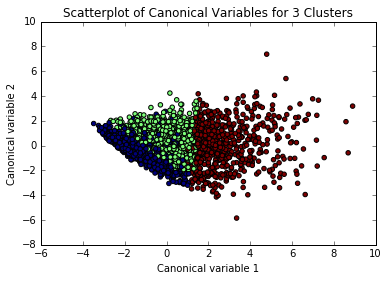

In [6]:
# Interpret 3 cluster solution
model3=KMeans(n_clusters=3)
model3.fit(clus_train)
clusassign=model3.predict(clus_train)
# plot clusters

from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(clus_train)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model3.labels_,)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 3 Clusters')
plt.show()



In [7]:
"""
BEGIN multiple steps to merge cluster assignment with clustering variables to examine
cluster variable means by cluster
"""
# create a unique identifier variable from the index for the 
# cluster training data to merge with the cluster assignment variable
clus_train.reset_index(level=0, inplace=True)
# create a list that has the new index variable
cluslist=list(clus_train['index'])
# create a list of cluster assignments
labels=list(model3.labels_)
# combine index variable list with cluster assignment list into a dictionary
newlist=dict(zip(cluslist, labels))
newlist
# convert newlist dictionary to a dataframe
newclus=DataFrame.from_dict(newlist, orient='index')
newclus
# rename the cluster assignment column
newclus.columns = ['cluster']

# now do the same for the cluster assignment variable
# create a unique identifier variable from the index for the 
# cluster assignment dataframe 
# to merge with cluster training data
newclus.reset_index(level=0, inplace=True)
# merge the cluster assignment dataframe with the cluster training variable dataframe
# by the index variable
merged_train=pd.merge(clus_train, newclus, on='index')
merged_train.head(n=100)
# cluster frequencies
merged_train.cluster.value_counts()

"""
END multiple steps to merge cluster assignment with clustering variables to examine
cluster variable means by cluster
"""

# FINALLY calculate clustering variable means by cluster
clustergrp = merged_train.groupby('cluster').mean()
print ("Clustering variable means by cluster")
print(clustergrp)




Clustering variable means by cluster
               index   ALCEVR1  MAREVER1  ALCPROBS1  DEVIANT1     VIOL1  \
cluster                                                                   
0        3238.273432 -1.056455 -0.474480  -0.412562 -0.450899 -0.264110   
1        3328.636691  0.946562 -0.050536  -0.048769 -0.110685 -0.162609   
2        3315.825633  0.657005  1.091407   0.888143  1.093628  0.786803   

             DEP1   ESTEEM1  SCHCONN1   PARACTV   PARPRES  FAMCONCT  
cluster                                                              
0       -0.292501  0.209016  0.342973  0.091971  0.156849  0.299811  
1       -0.197257  0.193738  0.136911  0.152491  0.105376  0.228784  
2        0.858903 -0.672163 -0.944052 -0.415650 -0.486679 -0.967016  


In [8]:
# validate clusters in training data by examining cluster differences in GPA using ANOVA
# first have to merge GPA with clustering variables and cluster assignment data 
gpa_data=data_clean['GPA1']
# split GPA data into train and test sets
gpa_train, gpa_test = train_test_split(gpa_data, test_size=.3, random_state=123)
gpa_train1=pd.DataFrame(gpa_train)
gpa_train1.reset_index(level=0, inplace=True)
merged_train_all=pd.merge(gpa_train1, merged_train, on='index')
sub1 = merged_train_all[['GPA1', 'cluster']].dropna()

import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 

gpamod = smf.ols(formula='GPA1 ~ C(cluster)', data=sub1).fit()
print (gpamod.summary())

print ('means for GPA by cluster')
m1= sub1.groupby('cluster').mean()
print (m1)

print ('standard deviations for GPA by cluster')
m2= sub1.groupby('cluster').std()
print (m2)

mc1 = multi.MultiComparison(sub1['GPA1'], sub1['cluster'])
res1 = mc1.tukeyhsd()
print(res1.summary())


                            OLS Regression Results                            
Dep. Variable:                   GPA1   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     135.6
Date:                Fri, 21 Oct 2016   Prob (F-statistic):           3.00e-57
Time:                        09:07:01   Log-Likelihood:                -3597.1
No. Observations:                3202   AIC:                             7200.
Df Residuals:                    3199   BIC:                             7218.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           2.9951      0.020    1